In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2, os, json

In [5]:
%cd ..

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/HeartReconstruction


/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Concat All Datasets for training

In [ ]:
## 1. Mini Dynamic

{'LV': [[34, 52], [33, 53], [32, 53], [31, 53], [30, 53], [29, 54], [28, 54], [27, 54], [26, 55], [25, 55], [24, 56], [23, 57], [22, 57], [21, 58], [20, 59], [19, 60], [18, 61], [17, 62], [16, 63], [16, 64], [16, 65], [16, 66], [16, 67], [16, 68], [16, 69], [16, 70], [16, 71], [16, 72], [16, 73], [17, 74], [17, 75], [17, 76], [18, 77], [18, 78], [19, 79], [20, 80], [21, 81], [22, 81], [23, 82], [24, 83], [25, 84], [26, 85], [27, 86], [28, 87], [29, 87], [30, 88], [31, 88], [32, 88], [33, 89], [34, 89], [35, 90], [36, 90], [37, 91], [38, 92], [39, 93], [40, 93], [41, 94], [42, 95], [43, 95], [44, 96], [45, 96], [46, 96], [47, 97], [48, 97], [49, 97], [50, 98], [51, 98], [52, 99], [53, 99], [54, 99], [55, 99], [56, 99], [57, 99], [58, 99], [59, 100], [60, 100], [61, 100], [62, 100], [63, 99], [64, 99], [65, 99], [66, 99], [67, 99], [68, 99], [69, 99], [70, 99], [71, 99], [72, 98], [73, 98], [74, 98], [75, 98], [76, 98], [77, 98], [78, 98], [79, 98], [80, 97], [81, 97], [82, 97], [83, 96]

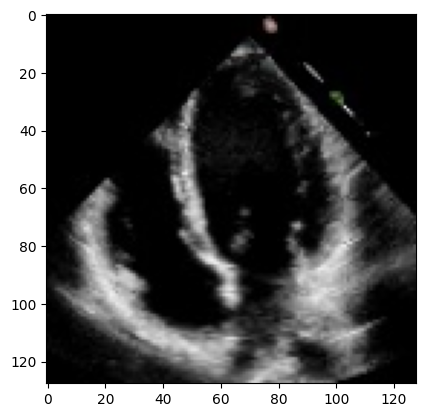

In [6]:
path = 'data/raw/Mini-EchoNet-Dynamic'

img = cv2.imread(os.path.join(path, 'Images', 'frame_1.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

with open(os.path.join(path, 'MasksJsonContours', 'mascara1.json')) as f:
    lbl = json.load(f)
    print(lbl)

plt.imshow(img)

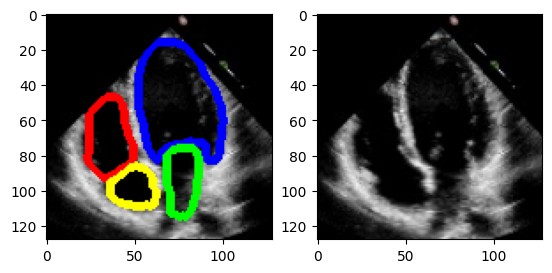

In [7]:
new_img = img.copy()

for key, vals in lbl.items():
    if key == "LV":
        color = (0, 0, 255)
    elif key == "LA":
        color = (0, 255, 0)
    elif key == "RV":
        color = (255, 0, 0)
    else:
        color = (255, 255, 0)
    for val in vals:
        x, y = val[1], val[0]
        cv2.circle(new_img, (x, y), 2, color, -1)

plt.subplot(121)
plt.imshow(new_img);
plt.subplot(122)
plt.imshow(img);

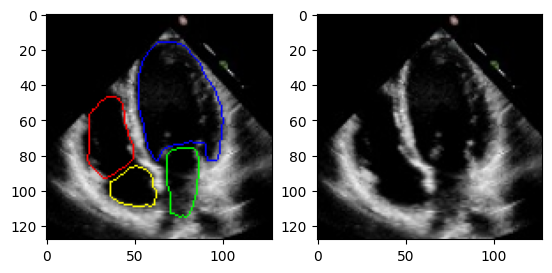

In [125]:
new_img = img.copy()

for key, vals in lbl.items():
    if key == "LV":
        color = (0, 0, 255)
    elif key == "LA":
        color = (0, 255, 0)
    elif key == "RV":
        color = (255, 0, 0)
    else:
        color = (255, 255, 0)
    for val in vals:
        x, y = val[1], val[0]
        cv2.circle(new_img, (x, y), 0, color, -1)  # cv2.circle(image, (x,y), radius=0, color=(0, 0, 255), thickness=-1)

plt.subplot(121)
plt.imshow(new_img);
plt.subplot(122)
plt.imshow(img);

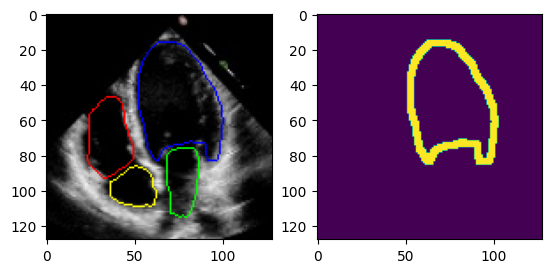

In [141]:
# Taking a matrix of size 5 as the kernel 
kernel = np.ones((4, 4), np.uint8) 

new_mask = cv2.dilate(np.float32(mask), kernel)

plt.subplot(121)
plt.imshow(new_img);
plt.subplot(122)
plt.imshow(new_mask);

(512, 512, 3)


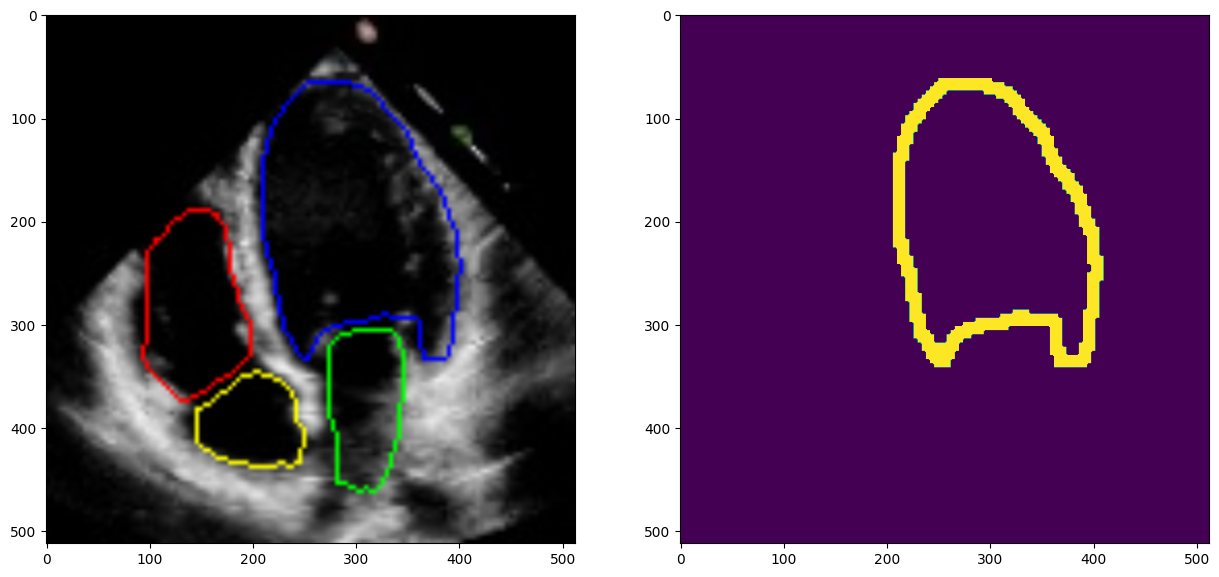

In [150]:
final_image = cv2.resize(new_img, (512, 512), cv2.INTER_CUBIC)
final_mask = cv2.resize(new_mask, (512, 512), cv2.INTER_CUBIC)
final_mask = np.where(final_mask > 250, 255, 0)
print(final_image.shape)

plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.imshow(final_image);
plt.subplot(122)
plt.imshow(final_mask);

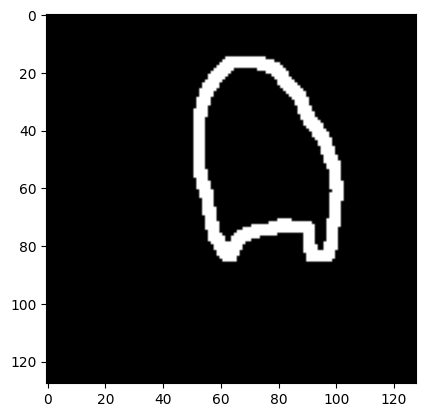

In [157]:
msk = np.zeros_like(new_img)

for key, vals in lbl.items():
    for val in vals:
        if key == "LV":
            x, y = val[1], val[0]
            cv2.circle(msk, (x, y), 0, (255, 255, 255), -1)  # cv2.circle(image, (x,y), radius=0, color=(0, 0, 255), thickness=-1)

# Taking a matrix of size 5 as the kernel 
kernel = np.ones((4, 4), np.uint8) 
new_mask = cv2.dilate(np.float32(msk), kernel)
# Convert to gray
new_mask = cv2.cvtColor(new_mask, cv2.COLOR_RGB2GRAY)

plt.imshow(new_mask, 'gray')

In [190]:
import re

def sort_paths(paths):

    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(paths, key=alphanum_key)

data/train/test/images/Dynamic_frame_1.png
data/train/test/images/Dynamic_frame_5.png
data/train/test/images/Dynamic_frame_9.png
data/train/test/images/Dynamic_frame_13.png
data/train/test/images/Dynamic_frame_17.png
data/train/test/images/Dynamic_frame_21.png
data/train/test/images/Dynamic_frame_25.png
data/train/test/images/Dynamic_frame_29.png
data/train/test/images/Dynamic_frame_33.png
data/train/test/images/Dynamic_frame_37.png
data/train/test/images/Dynamic_frame_41.png
data/train/test/images/Dynamic_frame_45.png
data/train/test/images/Dynamic_frame_49.png
data/train/test/images/Dynamic_frame_53.png
data/train/test/images/Dynamic_frame_57.png
data/train/test/images/Dynamic_frame_61.png
data/train/test/images/Dynamic_frame_65.png
data/train/test/images/Dynamic_frame_69.png
data/train/test/images/Dynamic_frame_73.png
data/train/test/images/Dynamic_frame_77.png
data/train/test/images/Dynamic_frame_81.png
data/train/test/images/Dynamic_frame_85.png
data/train/test/images/Dynamic_fram

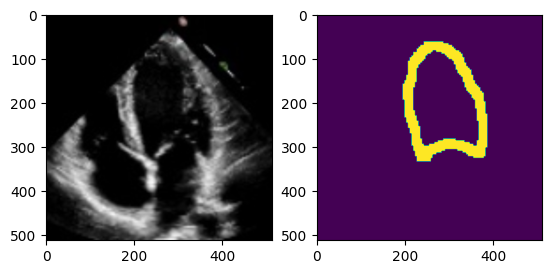

In [204]:
path = 'data/raw/Mini-EchoNet-Dynamic'
imgs_path = 'data/raw/Mini-EchoNet-Dynamic/Images'
msks_path = 'data/raw/Mini-EchoNet-Dynamic/MasksJsonContours'  # MasksJsonContours
all_frames = [ os.path.join(imgs_path, frame_name) for frame_name in os.listdir(imgs_path) ]
all_masks = [ os.path.join(msks_path, frame_name) for frame_name in os.listdir(msks_path) ]
all_frames = sort_paths(all_frames)
all_masks = sort_paths(all_masks)

# Taking a matrix of size 5 as the kernel 
kernel = np.ones((6, 6), np.uint8) 

for i, (f_path, m_path) in enumerate(zip(all_frames, all_masks)):
    
    img = cv2.imread(f_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    with open(m_path) as f:
        lbl = json.load(f)

    msk = np.zeros_like(img)

    for key, vals in lbl.items():
        for val in vals:
            if key == "LV":
                x, y = val[1], val[0]
                cv2.circle(msk, (x, y), 0, (255, 255, 255), -1)  # cv2.circle(image, (x,y), radius=0, color=(0, 0, 255), thickness=-1)

    msk = cv2.dilate(np.float32(msk), kernel)
    # Convert to gray
    msk = cv2.cvtColor(msk, cv2.COLOR_RGB2GRAY)

    # Reshape
    final_image = cv2.resize(img, (512, 512), cv2.INTER_CUBIC)
    final_mask = cv2.resize(msk, (512, 512), cv2.INTER_CUBIC)
    final_mask = np.where(final_mask > 250, 255, 0)

    # Save
    save_path = 'data/train'
    im_name = f_path.split('/')[-1].split('.')[0]
    # Every 4 to test
    if i % 4 == 0:
        print(os.path.join(save_path, 'test', "images", f'Dynamic_{im_name}.png'))
        cv2.imwrite(os.path.join(save_path, 'test', "images", f'Dynamic_{im_name}.png'), final_image)
        cv2.imwrite(os.path.join(save_path, 'test', "masks", f'Dynamic_{im_name}.png'), final_mask)
    else:
        cv2.imwrite(os.path.join(save_path, 'train', "images", f'Dynamic_{im_name}.png'), final_image)
        cv2.imwrite(os.path.join(save_path, 'train', "masks", f'Dynamic_{im_name}.png'), final_mask)

plt.subplot(121)
plt.imshow(final_image);
plt.subplot(122)
plt.imshow(final_mask);

## 2. Ekb dataset

In [26]:
def get_img_txt_path(inp_path, format='jpeg'):
    """ Вернёт список с путями до фото и контрольными точками в папке """
    # Find all objects in folder
    objects_name = os.listdir(inp_path)
    # Define new lists
    image_paths = []
    descriptions_paths = []
    #
    for obj_name in objects_name:
        if format in obj_name:
            image_paths.append(os.path.join(inp_path, obj_name))
        elif 'txt' in obj_name:
            descriptions_paths.append(os.path.join(inp_path, obj_name))
        else:
            print(obj_name)

    return sorted(image_paths, reverse=False), descriptions_paths

def open_image(image_path):
    assert isinstance(image_path, str)
    assert os.path.exists(image_path)

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

In [ ]:
def show_points(image, points):
    
    for i in range(0, array.shape[1] // 2, 2):
        plt.scatter(array[0][i+1], array[0][i], s=20, c='red', marker='o')

In [117]:
path = 'data/raw/12/12_np'  #   data/raw/12/12_6m', data/raw/12/12_np'] 12_6m, 12_np
# all_paths = os.listdir('data/raw/12')  # ['data/raw/12/12_0m', 'data/raw/12/12_6m', data/raw/12/12_np']
path_imgs, path_descripts = get_img_txt_path(path)
path_imgs[:5], path_descripts

(['data/raw/12/12_np/00.jpeg',
  'data/raw/12/12_np/01.jpeg',
  'data/raw/12/12_np/02.jpeg',
  'data/raw/12/12_np/03.jpeg',
  'data/raw/12/12_np/04.jpeg'],
 ['data/raw/12/12_np/12_np_epi.txt', 'data/raw/12/12_np/12_np_endo.txt'])

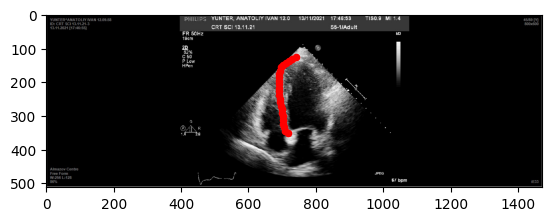

In [120]:
image = open_image('data/raw/12/12_np/00.jpeg')

# Read txt
with open(path_descripts[0]) as f:
    # lines = f.read()
    lines = f.readlines()[1:]

# Devide by rows
splited_lines = [line.split('\n') for line in lines]
# Split all values in every line
values = [line[0].split(' ') for line in splited_lines]

# Transform to numpy array and change type to int
array = np.array(values).astype('uint16')

plt.imshow(image)

for i in range(0, array.shape[1] // 2, 2):
    plt.scatter(array[0][i+1], array[0][i], s=20, c='red', marker='o')

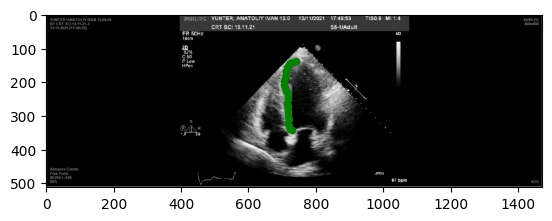

In [119]:
plt.imshow(image)

for i in range(0, array.shape[1] // 2, 2):
    plt.scatter(array[0][i+1], array[0][i], s=20, c='green', marker='o')

(430, 530, 3)


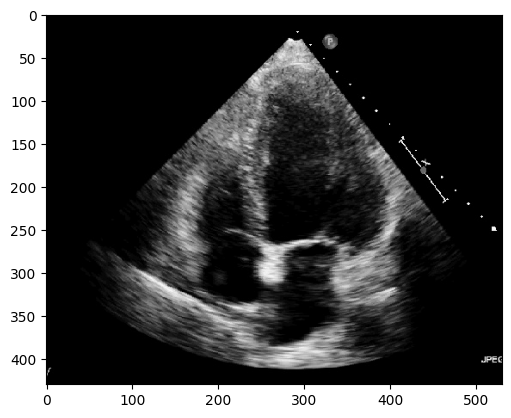

In [38]:
def prepare_image(image):
    # Crop boxes
    return image[70:500, 470:1000, :]


new_img = prepare_image(image)
print(new_img.shape)
plt.imshow(new_img);

In [115]:
def get_parsed_txt(path):
    """ 
        Input: Path to labels in .txt format
        Output: numpy.array with shape len(images, xy_points). In our case 98 with format (x1  y1  x  y)
    """
    #   Read txt
    with open(path) as f:
        # lines = f.read()
        lines = f.readlines()[1:]

    # Devide by rows
    splited_lines = [line.split('\n') for line in lines]
    # Split all values in every line
    values = [line[0].split(' ') for line in splited_lines]
    # Transform to numpy array and change type to int
    array = np.array(values).astype('uint16')

    return array

def parse_txt(labels_paths):
    """ Retrun arrays with ... for every patient """
    assert isinstance(labels_paths, list)
    assert labels_paths
    
    arrays = []
    for path in labels_paths:
        
        path_imgs, path_descripts = get_img_txt_path(path)
        # Endo
        endos = get_parsed_txt(path_descripts[0])
        epis = get_parsed_txt(path_descripts[1])
        for endo, epi in zip(endos, epis):
            # We have here i_frame and 98 points
            new_shape = (len(endo)//2, len(endo)//2)
            endo = np.reshape(endo, new_shape)
            epi = np.reshape(epi, new_shape)
            xy_points = np.concat([endo, epi], axis=0)
            print(xy_points.shape)

        # 2, n_img, n_descr
        new_array = [endo, epi]
        # n_img, (n_descr_epi + n_decrt_endo)
        new_array = np.reshape(new_array, (len(endo), len(endo[0])*2))
        print(new_array.shape)
        # n_img, n_vals//2, n_vals//2
        new_array = np.reshape(new_array, (len(endo), len(endo[0]), len(endo[0])))

        # arrays.append(new_arrays)
    
    print(len(arrays), len(arrays[0]), len(arrays[0][0]), len(arrays[0][0][0]))
    arrays = np.array(arrays)
    print(arrays.shape)
    n_imgs, n_points = len(arrays[0]), len(arrays[0][0])
    print(n_imgs, n_points)
    arrays = np.reshape(arrays, (len(arrays)//2, n_imgs, n_points*2))

    return arrays

In [116]:
all_paths = [os.path.join('data/raw/12', folder) for folder in os.listdir('data/raw/12')]  # ['12_6m', '12_np', '12_0m']
parse_txt(all_paths)

ValueError: cannot reshape array of size 98 into shape (49,49)